# Astronomical Data Science Library Demo
This Interactive Python Notebook (ipynb) file explains our library's functionalities, and includes a demonstration of how to execute required functions and handling of exceptions.

In [ ]:
# Install the library, which is distributed via Test PyPI
!python3 -m pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ cs107stargazers

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 36.1 MB/s eta 0:00:00


In [ ]:
# Import the library
import cs107stargazers

## Query Module

In the following theres an example of an ADQL query that when used as input into the Query() function returns an object with the following functionalities:

1. get_df
2. get_table (as in an astropy table)
3. print



In [ ]:
import pandas as pd # All our data is in Pandas DataFrame format, so we need this
from astroquery.sdss import SDSS
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from cs107stargazers import query

In [ ]:
#declaring my query
sample_query = """
SELECT
    TOP 10
    p.objID, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z
FROM
    PhotoObj AS p
WHERE
    p.u BETWEEN 0 AND 19.6
"""

object = query.Query(sample_query)

#this stored a dataframe object into df
df = object.get_df()

#this stores a table type object into astropy_table
astropy_table = object.get_table()

#this prints out the data obtained by the query
object.print()



       objID               ra               dec        ...    i        z    
------------------- ---------------- ----------------- ... -------- --------
1237678537416376475 319.855107255262  8.71000794986525 ... 16.56604 16.40493
1237679321774096394 3.99012821084209 -6.11657839984856 ... 16.92422 16.88132
1237679321774293108 4.47609980729239 -6.12668453451256 ... 17.82319 17.79516
1237679321774293159 4.57646000102861 -6.07174662883298 ... 16.50827 16.34224
1237679321776914474 10.4572497518612 -6.06263878936387 ... 14.99698 14.80965
1237679321777242131 11.3042357027852 -6.22087295834064 ... 17.31822  17.2555
1237679321777373209 11.5677943389135 -6.06065234786156 ... 16.87575 16.81628
1237679321778683924 14.5942688944471 -6.01012145030255 ... 16.57353  16.5056
1237679321779339268 16.0360177563126 -5.95854592578773 ... 15.80109 15.75423
1237679321780715603 19.2787644208696  -5.9030590151752 ... 17.21273 17.14535


## Metadata Extraction

This module is used to extract metadata information. It work by first creating a `MetadataExctractor` object, by passing in the data (whether from the `query` step of our pipiline, or one that is directly provided by the user), and then can use the method `extract_metadata` to extract a list of several metadata information, or use `extract_specific_field` to extract a single metadata field. See the below for an example:

In [ ]:
# Import metadata exctraction module
from cs107stargazers import metadata_extraction

In [ ]:
# Create metadata extractor object
metadata_extractor_object = metadata_extraction.MetadataExtractor(df)

In [ ]:
# Extract `identifier` and `ra` (right ascension)
multiple_metadata = metadata_extractor_object.extract_metadata(["dec", "ra"])
multiple_metadata

,dec,ra
0,8.710008,319.855107
1,-6.116578,3.990128
2,-6.126685,4.476100
3,-6.071747,4.576460
4,-6.062639,10.457250
5,-6.220873,11.304236
6,-6.060652,11.567794
7,-6.010121,14.594269
8,-5.958546,16.036018
9,-5.903059,19.278764


In [ ]:
# Extract `ra` specifically
specific_metadata = metadata_extractor_object.extract_specific_field("ra")
specific_metadata

0    319.855107
1      3.990128
2      4.476100
3      4.576460
4     10.457250
5     11.304236
6     11.567794
7     14.594269
8     16.036018
9     19.278764
Name: ra, dtype: float64

## Preprocessing function

The following demonstrates how to create a preprocessing object and how to use its following functionalities:

1. normalize
2. rm_outlier
3. interpolate
4. get_redshift_corr

In [ ]:
from cs107stargazers import preprocessing

In [ ]:
#normalize df declared before, making all columns except ID have range 0-1
pp = preprocessing.Preprocessing(df)
pp.normalize(replace = True)
pp.data.head()

,objID,ra,dec,u,g,r,i,z
0,1237678537416376475,1.000000,1.000000,0.403671,0.459013,0.518441,0.555182,0.534341
1,1237679321774096394,0.000000,0.006985,0.537312,0.616918,0.674803,0.681917,0.693908
2,1237679321774293108,0.001539,0.006308,0.776977,1.000000,1.000000,1.000000,1.000000
3,1237679321774293159,0.001856,0.009988,1.000000,0.642794,0.570729,0.534741,0.513343
4,1237679321776914474,0.020474,0.010598,0.311592,0.000000,0.000000,0.000000,0.000000


In [ ]:
#rm_oulier, you can see it removed an outlier in  RA!
pp = preprocessing.Preprocessing(df)
pp.rm_outlier(replace = True )
print(df.head())
pp.data.head()




                 objID          ra       dec         u         g         r  \
0  1237678537416376475  319.855107  8.710008  18.35033  17.13285  16.66923   
1  1237679321774096394    3.990128 -6.116578  18.59702  17.47490  17.07987   
2  1237679321774293108    4.476100 -6.126685  19.03942  18.30472  17.93391   
3  1237679321774293159    4.576460 -6.071747  19.45110  17.53095  16.80655   
4  1237679321776914474   10.457250 -6.062639  18.18036  16.13855  15.30769   

          i         z  
0  16.56604  16.40493  
1  16.92422  16.88132  
2  17.82319  17.79516  
3  16.50827  16.34224  
4  14.99698  14.80965  


,objID,ra,dec,u,g,r,i,z
1,1237679321774096394,3.990128,-6.116578,18.59702,17.47490,17.07987,16.92422,16.88132
2,1237679321774293108,4.476100,-6.126685,19.03942,18.30472,17.93391,17.82319,17.79516
3,1237679321774293159,4.576460,-6.071747,19.45110,17.53095,16.80655,16.50827,16.34224
4,1237679321776914474,10.457250,-6.062639,18.18036,16.13855,15.30769,14.99698,14.80965
5,1237679321777242131,11.304236,-6.220873,19.23810,18.04356,17.51633,17.31822,17.25550


In [ ]:
#interpolated using kNN nearest neighbors regression!!!
pp = preprocessing.Preprocessing(df)
pp.interpolate([13, 14, 15], y_col = 'z', x_col='ra', replace =True)
pp.data.head()

,objID,ra,dec,u,g,r,i,z,ra_x_interpolate,z_y_interpolated
0,1237678537416376475,319.855107,8.710008,18.35033,17.13285,16.66923,16.56604,16.40493,13.0,10.356576
1,1237679321774096394,3.990128,-6.116578,18.59702,17.47490,17.07987,16.92422,16.88132,14.0,10.356576
2,1237679321774293108,4.476100,-6.126685,19.03942,18.30472,17.93391,17.82319,17.79516,15.0,10.356576
3,1237679321774293159,4.576460,-6.071747,19.45110,17.53095,16.80655,16.50827,16.34224,NaN,NaN
4,1237679321776914474,10.457250,-6.062639,18.18036,16.13855,15.30769,14.99698,14.80965,NaN,NaN


In [ ]:
#get_redshift_corr with the redshift column, should mean corr = 1
corr = pp.get_redshift_corr(col = 'z')
print(corr)

1.0


## Data Augmentation Differintegral/Fractional Derivative Module

In [ ]:
from cs107stargazers import augment

In [ ]:
mat = np.array([[ 1237678537416376475,  3.19855107e+02,  8.71000795e+00,
         1.83503300e+01,  1.71328500e+01,  1.66692300e+01,
         1.65660400e+01,  1.64049300e+01],
       [ 1237679321774096394,  3.99012821e+00, -6.11657840e+00,
         1.85970200e+01,  1.74749000e+01,  1.70798700e+01,
         1.69242200e+01,  1.68813200e+01],
       [ 1237679321774293108,  4.47609981e+00, -6.12668453e+00,
         1.90394200e+01,  1.83047200e+01,  1.79339100e+01,
         1.78231900e+01,  1.77951600e+01],
       [ 1237679321774293159,  4.57646000e+00, -6.07174663e+00,
         1.94511000e+01,  1.75309500e+01,  1.68065500e+01,
         1.65082700e+01,  1.63422400e+01],
       [ 1237679321776914474,  1.04572498e+01, -6.06263879e+00,
         1.81803600e+01,  1.61385500e+01,  1.53076900e+01,
         1.49969800e+01,  1.48096500e+01],
       [ 1237679321777242131,  1.13042357e+01, -6.22087296e+00,
         1.92381000e+01,  1.80435600e+01,  1.75163300e+01,
         1.73182200e+01,  1.72555000e+01],
       [ 1237679321777373209,  1.15677943e+01, -6.06065235e+00,
         1.86935600e+01,  1.74812300e+01,  1.70313800e+01,
         1.68757500e+01,  1.68162800e+01],
       [ 1237679321778683924,  1.45942689e+01, -6.01012145e+00,
         1.84718700e+01,  1.71846700e+01,  1.67297400e+01,
         1.65735300e+01,  1.65056000e+01],
       [ 1237679321779339268,  1.60360178e+01, -5.95854593e+00,
         1.76051900e+01,  1.64301900e+01,  1.59924300e+01,
         1.58010900e+01,  1.57542300e+01],
       [ 1237679321780715603,  1.92787644e+01, -5.90305902e+00,
         1.88168200e+01,  1.77291400e+01,  1.73524300e+01,
         1.72127300e+01,  1.71453500e+01]])

df = pd.DataFrame(mat, columns=["objID", "ra", "dec", "u", "g", "r", "i", "z"])

# Test class instantiation and data attribute
test1 = augment.Augment(df)

# Test derive() -- get derivatives of specified variables, using their vector of values [i.e. emprical derivative, not analytical]
# all columns (vars)
test2 = test1.derive()
# notrun
test3 = test1.derive(notrun="objID")
# run
test4 = test1.derive(run="ra")

# Test fractional_derive() -- get differintegrals of a specified degree (ex: 0.5) for specified variables, using their vector of vaues [i.e. empirical differintegral, not analytical]
# all columns (vars)
test5 = test1.fractional_derive(0.5)
# notrun
test6 = test1.fractional_derive(0.5, notrun="objID")
# run
test7 = test1.fractional_derive(0.5, run="ra")


In [ ]:
# Augmented pandas dataframes are returned, with the specified derivatives added as columns
print("test1")
test1.data.head  # pre-augmentation data

test1


<bound method NDFrame.head of           objID          ra       dec         u         g         r         i  \
0  1.237679e+18  319.855107  8.710008  18.35033  17.13285  16.66923  16.56604   
1  1.237679e+18    3.990128 -6.116578  18.59702  17.47490  17.07987  16.92422   
2  1.237679e+18    4.476100 -6.126685  19.03942  18.30472  17.93391  17.82319   
3  1.237679e+18    4.576460 -6.071747  19.45110  17.53095  16.80655  16.50827   
4  1.237679e+18   10.457250 -6.062639  18.18036  16.13855  15.30769  14.99698   
5  1.237679e+18   11.304236 -6.220873  19.23810  18.04356  17.51633  17.31822   
6  1.237679e+18   11.567794 -6.060652  18.69356  17.48123  17.03138  16.87575   
7  1.237679e+18   14.594269 -6.010121  18.47187  17.18467  16.72974  16.57353   
8  1.237679e+18   16.036018 -5.958546  17.60519  16.43019  15.99243  15.80109   
9  1.237679e+18   19.278764 -5.903059  18.81682  17.72914  17.35243  17.21273   

          z  
0  16.40493  
1  16.88132  
2  17.79516  
3  16.34224  
4  14.80

In [ ]:
# Ex:
print("test7")
test7.head
# d_ra is now included in the augmented pd df, as per run="ra"

test7


<bound method NDFrame.head of           objID          ra       dec         u         g         r         i  \
0  1.237679e+18  319.855107  8.710008  18.35033  17.13285  16.66923  16.56604   
1  1.237679e+18    3.990128 -6.116578  18.59702  17.47490  17.07987  16.92422   
2  1.237679e+18    4.476100 -6.126685  19.03942  18.30472  17.93391  17.82319   
3  1.237679e+18    4.576460 -6.071747  19.45110  17.53095  16.80655  16.50827   
4  1.237679e+18   10.457250 -6.062639  18.18036  16.13855  15.30769  14.99698   
5  1.237679e+18   11.304236 -6.220873  19.23810  18.04356  17.51633  17.31822   
6  1.237679e+18   11.567794 -6.060652  18.69356  17.48123  17.03138  16.87575   
7  1.237679e+18   14.594269 -6.010121  18.47187  17.18467  16.72974  16.57353   
8  1.237679e+18   16.036018 -5.958546  17.60519  16.43019  15.99243  15.80109   
9  1.237679e+18   19.278764 -5.903059  18.81682  17.72914  17.35243  17.21273   

          z       d_ra  
0  16.40493   0.000000  
1  16.88132   0.000000  
2  

## ML Classification Module


In [ ]:
from cs107stargazers import ml_stargazer

In [ ]:
query_string = """
SELECT TOP 100
  s.specobjid, s.ra, s.dec,
    s.z, s.zerr,
  s.plate, s.fiberID, s.mjd,
  p.petroMag_u, p.petroMag_g, p.petroMag_r, p.petroMag_i, p.petroMag_z
FROM
  specObj AS s
JOIN
  photoObj AS p ON s.bestobjid = p.objid
WHERE
  s.ra BETWEEN 150.0 AND 150.2
  AND s.dec BETWEEN 2.0 AND 2.2
"""

# Use astroquery to execute the query_string
result = SDSS.query_sql(query_string)

# Convert the result to a pandas DataFrame
df = result.to_pandas()

# go
vars_predict = ["s.ra", "s.dec"]
test1 = ml_stargazer.Ml_stargazer(df, vars_predict)

test1.fit()

# predict
test2 = test1.predict()
test3 = test1.predict("df")

# predict_proba
test4 = test1.predict_prob()
test5 = test1.predict_prob("df")


/usr/local/lib/python3.10/dist-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [ ]:
# prediction results as an array : classification predictions for each objid
test2

array([2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1])

In [ ]:
# same results as test2, but with "df" option, predict() returned an augmented df with the predictions for each objid/row
test3.head

<bound method NDFrame.head of               specobjid         ra       dec         z      zerr  plate  \
0   5333439080460951552  150.15146  2.114508  0.360811  0.000071   4737   
1   5333441279484207104  150.15839  2.139557  1.806560  0.000217   4737   
2   5333450350455136256  150.01425  2.123165  0.674894  0.000264   4737   
3   5333440179972579328  150.10200  2.105460  2.288163  0.000201   4737   
4   5333439355338858496  150.19896  2.132502  2.159098  0.000397   4737   
5   3551219228948406272  150.03183  2.153030  0.000040  0.000013   3154   
6   3551132367529811968  150.05767  2.103981  0.000143  0.000008   3154   
7    564181993697339392  150.17974  2.110343  0.360109  0.000029    501   
8    563102269235554304  150.19857  2.068522  0.185325  0.000033    500   
9   5333439630216765440  150.19558  2.004407  1.918056  0.000742   4737   
10   563102544113461248  150.09074  2.000002  0.219072  0.000039    500   
11   563091274119276544  150.01336  2.029592  0.078522  0.000015    50

In [ ]:
# prediction results as an array : classification probabilities for each objid
test4

array([[1.24459143e-07, 9.80114265e-01, 1.98856103e-02],
       [2.00232952e-09, 5.01031774e-01, 4.98968224e-01],
       [4.99892159e-01, 2.15697293e-04, 4.99892144e-01],
       [4.40243187e-02, 7.89101983e-01, 1.66873698e-01],
       [2.31155326e-13, 9.30136797e-01, 6.98632026e-02],
       [4.99707022e-01, 5.80700291e-04, 4.99712278e-01],
       [4.71573348e-01, 6.91180520e-02, 4.59308600e-01],
       [1.40967047e-10, 9.99891303e-01, 1.08697249e-04],
       [2.22506004e-11, 1.00000000e+00, 4.04687331e-13],
       [3.85885430e-09, 9.99999996e-01, 2.64438108e-24],
       [5.00323451e-01, 4.99676549e-01, 1.15247646e-19],
       [9.86721268e-01, 1.32787314e-02, 6.52808487e-10],
       [5.39345578e-01, 4.60654422e-01, 3.25737332e-15],
       [5.24498783e-01, 4.75501217e-01, 8.26990131e-17]])

In [ ]:
# same results as test4, but as an augmented df (due to "df" option in predict_proba())
test5.head

<bound method NDFrame.head of               specobjid         ra       dec         z      zerr  plate  \
0   5333439080460951552  150.15146  2.114508  0.360811  0.000071   4737   
1   5333441279484207104  150.15839  2.139557  1.806560  0.000217   4737   
2   5333450350455136256  150.01425  2.123165  0.674894  0.000264   4737   
3   5333440179972579328  150.10200  2.105460  2.288163  0.000201   4737   
4   5333439355338858496  150.19896  2.132502  2.159098  0.000397   4737   
5   3551219228948406272  150.03183  2.153030  0.000040  0.000013   3154   
6   3551132367529811968  150.05767  2.103981  0.000143  0.000008   3154   
7    564181993697339392  150.17974  2.110343  0.360109  0.000029    501   
8    563102269235554304  150.19857  2.068522  0.185325  0.000033    500   
9   5333439630216765440  150.19558  2.004407  1.918056  0.000742   4737   
10   563102544113461248  150.09074  2.000002  0.219072  0.000039    500   
11   563091274119276544  150.01336  2.029592  0.078522  0.000015    50

## Spectrum Alignment Module

In [ ]:
from cs107stargazers.spectrumalignment import SpectrumAlignment

This module is used for aligning spectra based on their wavlength ranges.

get_df: Creates a nock datafarme using pandas.Dataframe with predefined values for Flux and Loglam columns.

test_common_range_creation: Tests the creation of common wavelength range. Creates a SpectrumAlignment instance using MockQuery. Defines mock dict spectra_data containing the wavelength and flux values for 2 spectra. Calls the _create_common_range with the mock data then asserts the common_range of the SpectrumAlignment instance is a np array with at least one element.

test_interpolate_spectrum: Tests the interpolation of a spectrum onto the common range. Creates SpectrumAlignment instances using MockQuery. Defines

In [ ]:
 # Create a SpectrumAlignment object instance
spectral_alignment_object = SpectrumAlignment(df)

# Some spectra data
spectra_data = {
    'spectrum_1': {'wavelengths': np.array([400, 500, 600]), 'flux_values': np.array([0.5, 0.8, 1.2])},
    'spectrum_2': {'wavelengths': np.array([410, 520, 630]), 'flux_values': np.array([0.6, 0.9, 1.4])}
    # Add more spectra data as needed for testing
}
# Creation of a common range of wavelengths
spectral_alignment_object._create_common_range(spectra_data)

# Print the common range of wavelenghts
spectral_alignment_object.common_range


array([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58

In [ ]:
# Mock wavelengths and flux values
wavelengths = np.array([400, 500, 600])
flux_values = np.array([0.5, 0.8, 1.2])

# Spectrum interpolation
aligned_flux_values = spectral_alignment_object._interpolate_spectrum(wavelengths, flux_values)

# Print the aligned flux values
aligned_flux_values

array([0.5  , 0.503, 0.506, 0.509, 0.512, 0.515, 0.518, 0.521, 0.524,
       0.527, 0.53 , 0.533, 0.536, 0.539, 0.542, 0.545, 0.548, 0.551,
       0.554, 0.557, 0.56 , 0.563, 0.566, 0.569, 0.572, 0.575, 0.578,
       0.581, 0.584, 0.587, 0.59 , 0.593, 0.596, 0.599, 0.602, 0.605,
       0.608, 0.611, 0.614, 0.617, 0.62 , 0.623, 0.626, 0.629, 0.632,
       0.635, 0.638, 0.641, 0.644, 0.647, 0.65 , 0.653, 0.656, 0.659,
       0.662, 0.665, 0.668, 0.671, 0.674, 0.677, 0.68 , 0.683, 0.686,
       0.689, 0.692, 0.695, 0.698, 0.701, 0.704, 0.707, 0.71 , 0.713,
       0.716, 0.719, 0.722, 0.725, 0.728, 0.731, 0.734, 0.737, 0.74 ,
       0.743, 0.746, 0.749, 0.752, 0.755, 0.758, 0.761, 0.764, 0.767,
       0.77 , 0.773, 0.776, 0.779, 0.782, 0.785, 0.788, 0.791, 0.794,
       0.797, 0.8  , 0.804, 0.808, 0.812, 0.816, 0.82 , 0.824, 0.828,
       0.832, 0.836, 0.84 , 0.844, 0.848, 0.852, 0.856, 0.86 , 0.864,
       0.868, 0.872, 0.876, 0.88 , 0.884, 0.888, 0.892, 0.896, 0.9  ,
       0.904, 0.908,

## Visualization Module

In [ ]:
from cs107stargazers import visualization

spectralplot method:
We created a basic spectral plot using matplotlib. It assumes that the data passed to the class has 'wavelength' and 'flux' columns.
The plt.figure(figsize=(10, 6)) line sets the size of the plot.
The plt.plot(self.data['wavelength'], self.data['flux']) line plots the spectral data.
The remaining lines set labels and a title for the plot.
plt.show() displays the plot.

ic_overlay method:
This method creates a spectral plot with an overlay of an inferred continuum. It assumes the existence of an 'inferred_continuum' column in the data.
Similar to spectralplot, it sets the size of the plot using plt.figure(figsize=(10, 6)).
It then plots both the spectral data and the inferred continuum on the same plot using plt.plot.
plt.show() is called to display the plot.

In [ ]:
# Sample data
df = pd.DataFrame({
        "wavelength": [412, 536, 615, 748, 811],
        "flux": [12, 25, 19, 23, 36],
        "inferred_continuum": [1, 2, 3, 4, 5]
    })


# Create instance of SDSSVis
visualization_object = visualization.SDSSVis(df)

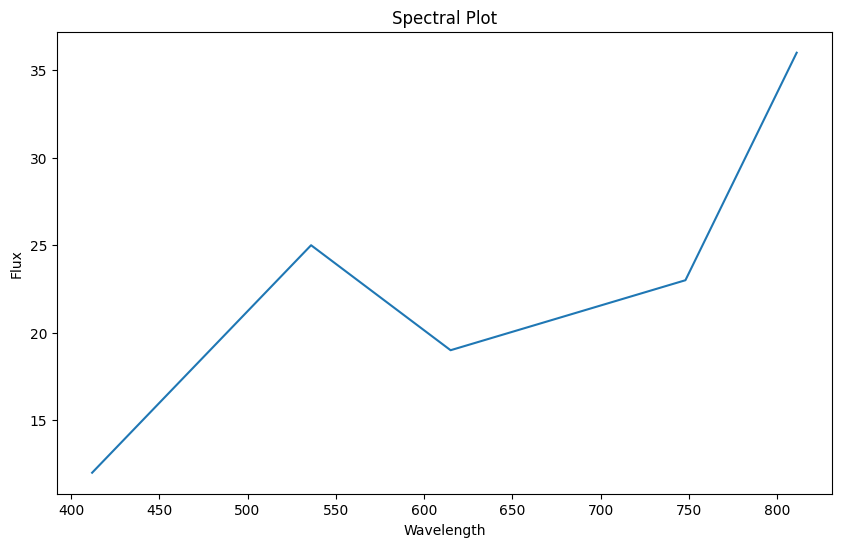

In [ ]:
# Call `spectralplot` method
visualization_object.spectralplot()

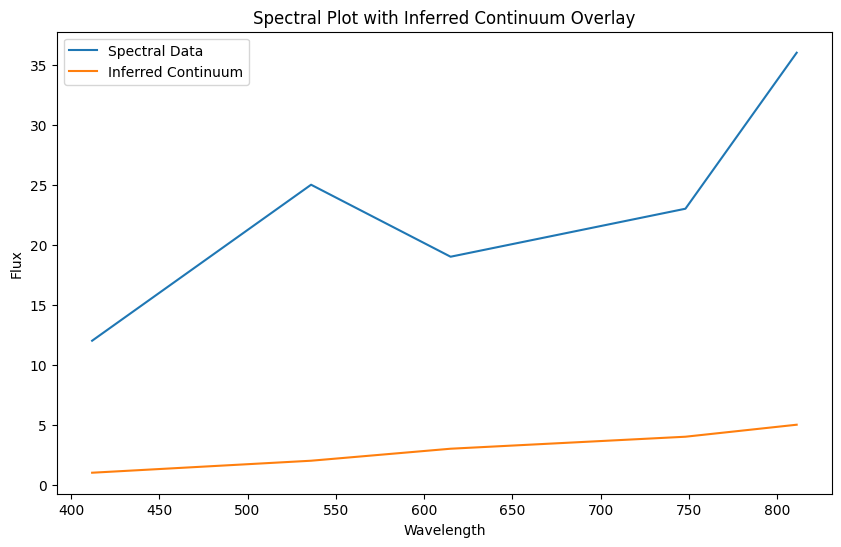

In [ ]:
# Call `ic_overlay()` method
visualization_object.ic_overlay()